In [1]:
from sklearn.datasets import make_multilabel_classification
import bls3
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset,load_from_arff
from skmultilearn.dataset import available_data_sets
from sklearn.metrics import accuracy_score,hamming_loss,f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import seed
from random import randrange,random
from csv import reader
import bagging1
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN,MLTSVM,MLARAM
import timeit
import copy

D:\anaconda3\envs\openne\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
set([x[0] for x in available_data_sets().keys()])

{'Corel5k',
 'bibtex',
 'birds',
 'delicious',
 'emotions',
 'enron',
 'genbase',
 'mediamill',
 'medical',
 'rcv1subset1',
 'rcv1subset2',
 'rcv1subset3',
 'rcv1subset4',
 'rcv1subset5',
 'scene',
 'tmc2007_500',
 'yeast'}

In [3]:
X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
X_test, y_test, _, _ = load_dataset('emotions', 'test')
X=np.vstack([X_train.toarray(),X_test.toarray()])
y=np.vstack([y_train.toarray(),y_test.toarray()])

emotions:train - exists, not redownloading
emotions:test - exists, not redownloading


In [4]:
bls = bls3.broadnet(maptimes = 30,
               enhencetimes = 40,
               map_function = 'sigmoid',
               enhence_function = 'sigmoid',
               batchsize = 'auto',
               reg = 0.001)

In [5]:
bagging_net=bagging1.bagging_net(10,bls,False)

In [6]:
kNN = MLkNN()
ARAM=MLARAM()
RFC=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [7]:
model=[dtc,RFC,bls,bagging_net,kNN,ARAM]

In [8]:
#num用于控制循环的次数
num=20
accuracy_total=[[]for i in range(len(model))]
hamming_total=[[]for i in range(len(model))]
f1_micro_total=[[]for i in range(len(model))]
f1_macro_total=[[]for i in range(len(model))]
time_total=[[]for i in range(len(model))]

In [9]:
for j in range(num):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    for i in range(len(model)):
        start = timeit.default_timer()
        classifier=copy.deepcopy(model[i])
        classifier.fit(X_train,y_train)
        end = timeit.default_timer()
        prediction=classifier.predict(X_test)
        accuracy_total[i].append(accuracy_score(y_pred=prediction,y_true=y_test))
        hamming_total[i].append(hamming_loss(y_pred=prediction,y_true=y_test))
        f1_micro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='micro'))
        f1_macro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='macro'))
        time_total[i].append(end-start)

number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96539 minvalue 0.0227 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9776 minvalue 0.03577 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96504 minvalue 0.03121 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96728 minvalue 0.03035 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98157 minvalue 0.02555 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96994 minvalue 0.03387 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97594 minvalue 0.03157 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97589 minvalue 0.03406 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95755 minvalue 0.03941 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96019 minvalue 0.02849 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97284 minvalue 0.02081 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96383 minvalue 0.02876 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97752 minvalue 0.03456 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97824 minvalue 0.02305 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97613 minvalue 0.02576 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96584 minvalue 0.03484 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97189 minvalue 0.04311 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97161 minvalue 0.02172 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97044 minvalue 0.02537 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96574 minvalue 0.02634 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97939 minvalue 0.02721 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96421 minvalue 0.03506 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97345 minvalue 0.02551 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98594 minvalue 0.02705 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97466 minvalue 0.0247 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97685 minvalue 0.02809 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97711 minvalue 0.02661 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9649 minvalue 0.02896 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96997 minvalue 0.03197 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97695 minvalue 0.02803 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98255 minvalue 0.02748 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97313 minvalue 0.0254 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96996 minvalue 0.02066 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96112 minvalue 0.02706 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97356 minvalue 0.02612 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96971 minvalue 0.0179 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9769 minvalue 0.01976 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97334 minvalue 0.01958 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97796 minvalue 0.03834 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97762 minvalue 0.02442 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96796 minvalue 0.02608 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96799 minvalue 0.02173 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96183 minvalue 0.02897 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97894 minvalue 0.03238 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96896 minvalue 0.02649 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96985 minvalue 0.02966 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97169 minvalue 0.03087 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97102 minvalue 0.02789 
number of mapping nodes 2160, number of enhence nodes 2880
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

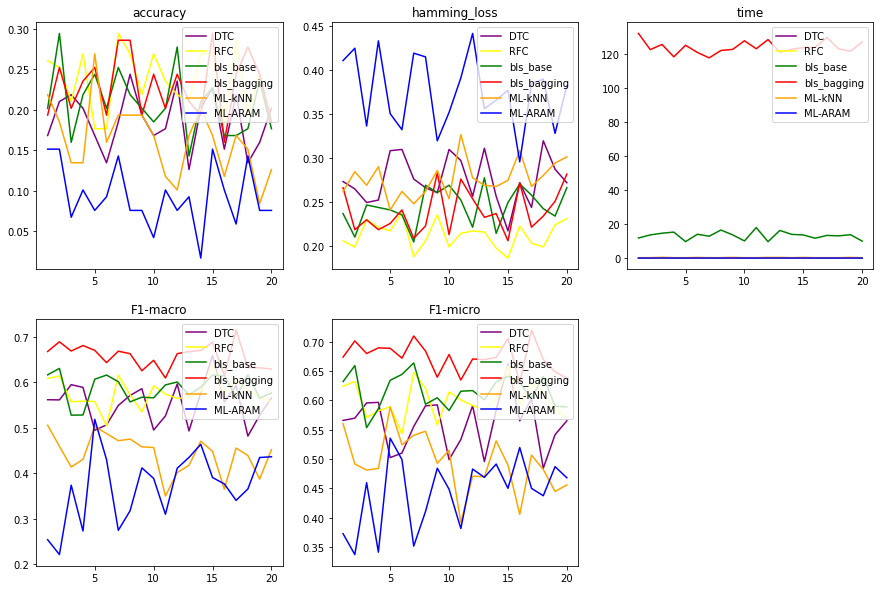

In [10]:
plt.figure(1,figsize=(15,10))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.plot(range(1,num+1),accuracy_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),accuracy_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),accuracy_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),accuracy_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),accuracy_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),accuracy_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.plot(range(1,num+1),hamming_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),hamming_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),hamming_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),hamming_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),hamming_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),hamming_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,3)
plt.title("time")
plt.plot(range(1,num+1),time_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),time_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),time_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),time_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),time_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),time_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.plot(range(1,num+1),f1_macro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_macro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_macro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_macro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_macro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_macro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.plot(range(1,num+1),f1_micro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_micro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_micro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_micro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_micro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_micro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.show()

In [11]:
score=[[]for i in range(5)]
for i in range(len(model)):
    print('the accuracy score of model{0}'.format(i+1),np.mean(accuracy_total[i]))
    score[0].append(np.mean(accuracy_total[i]))
    print('the hamming loss of model{0}'.format(i+1),np.mean(hamming_total[i]))
    score[1].append(np.mean(hamming_total[i]))
    print('the time of model{0}'.format(i+1),np.mean(time_total[i]))
    score[2].append(np.mean(time_total[i]))
    print('the F1 macro score of model{0}'.format(i+1),np.mean(f1_macro_total[i]))
    score[3].append(np.mean(f1_macro_total[i]))
    print('the F1 micro score of model{0}'.format(i+1),np.mean(f1_micro_total[i]))
    score[4].append(np.mean(f1_micro_total[i]))
    print('\n')

the accuracy score of model1 0.1861344537815126
the hamming loss of model1 0.275
the time of model1 0.03260237000000283
the F1 macro score of model1 0.5541774340204868
the F1 micro score of model1 0.5599482028386406


the accuracy score of model2 0.23445378151260504
the hamming loss of model2 0.21246498599439775
the time of model2 0.04565932500001295
the F1 macro score of model2 0.5762290711808011
the F1 micro score of model2 0.6001862142722769


the accuracy score of model3 0.2079831932773109
the hamming loss of model3 0.2450280112044818
the time of model3 13.278186259999998
the F1 macro score of model3 0.5864070608963499
the F1 micro score of model3 0.6154308515203003


the accuracy score of model4 0.22941176470588237
the hamming loss of model4 0.2394957983193277
the time of model4 124.05575060499999
the F1 macro score of model4 0.6573648323780957
the F1 micro score of model4 0.6736216463743646


the accuracy score of model5 0.16260504201680673
the hamming loss of model5 0.2761204481

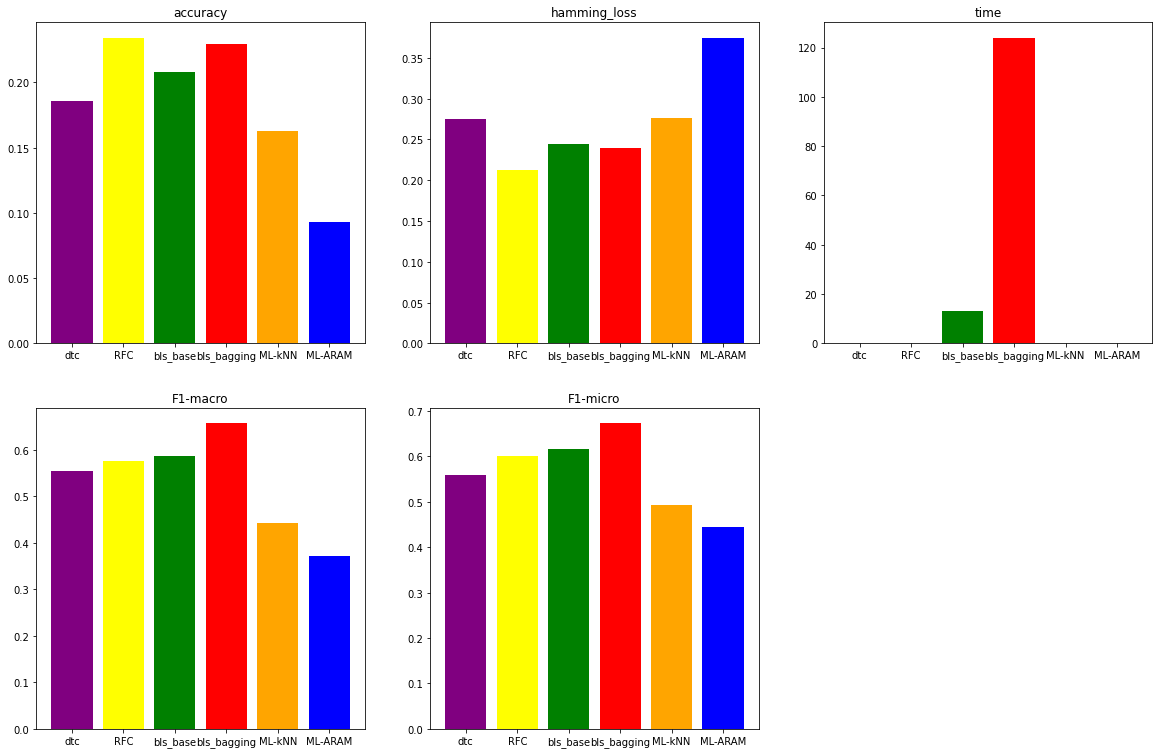

In [14]:
model_name=['dtc','RFC','bls_base','bls_bagging','ML-kNN','ML-ARAM']
plt.figure(1,figsize=(20,13))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.bar(model_name,score[0],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.bar(model_name,score[1],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,3)
plt.title("time")
plt.bar(model_name,score[2],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.bar(model_name,score[3],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.bar(model_name,score[4],color=['purple','yellow','green','red','orange','blue'])
plt.show()